In [1]:
from google.colab import files
uploaded = files.upload()


Saving TSLA.csv to TSLA.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-27,101.000000,105.160004,98.806000,102.872002,102.872002,71887000
1,2020-03-30,102.052002,103.330002,98.246002,100.426003,100.426003,59990500
2,2020-03-31,100.250000,108.592003,99.400002,104.800003,104.800003,88857500
3,2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000
4,2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000


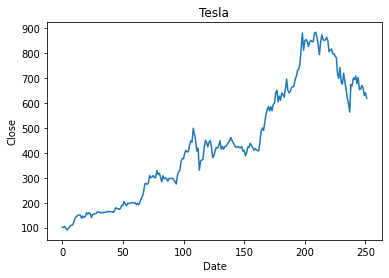

In [3]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [4]:
#let’s create a new DataFrame with only these two columns
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [5]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [6]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-03-22,131.630090,-648.761773,936.249726
613,2022-03-23,129.584278,-660.618435,949.041954
614,2022-03-24,127.202999,-670.453815,941.872318
615,2022-03-25,125.492270,-683.502267,929.198130
616,2022-03-26,134.596307,-674.243045,945.359993


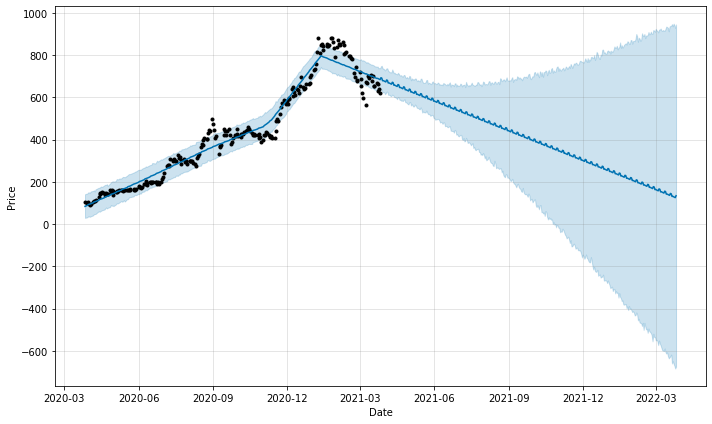

In [8]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")